In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## Basics
Ensemble learning: use multiple models in training task and compile the results together.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

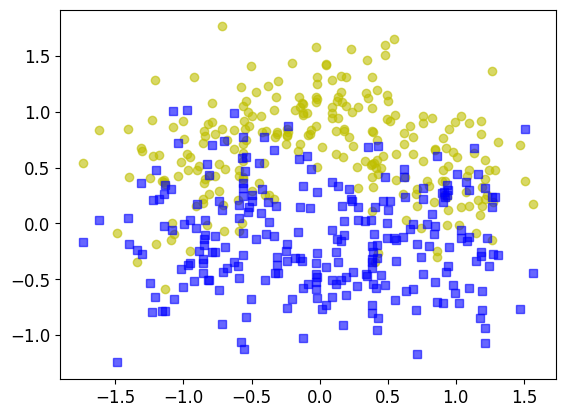

In [3]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha = 0.6)
plt.plot(X[:,0][y==0],X[:,1][y==1],'bs',alpha = 0.6)

### Hard voting and soft voting in classification
* Hard voting: Use the majority **result** in all the classifiers
* Soft voting: Take the weighted average of **probabilities** and classify

### Soft Voting
In order to use soft voting, the models have to be able to output probabilities

In [4]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[('logistic', log_clf),
                                         ('random forest', rnd_clf),
                                         ('svc', svm_clf)], voting='soft')

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(random_state=42)),
                             ('random forest',
                              RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [6]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}")

LogisticRegression accuracy: 0.864
RandomForestClassifier accuracy: 0.896
SVC accuracy: 0.896
VotingClassifier accuracy: 0.92


### Hard voting

In [11]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)

# Let svc to output labels, not probabilities
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(estimators=[('logistic', log_clf),
                                         ('random forest', rnd_clf),
                                         ('svc', svm_clf)], voting='hard')

In [12]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}")

LogisticRegression accuracy: 0.864
RandomForestClassifier accuracy: 0.896
SVC accuracy: 0.896
VotingClassifier accuracy: 0.912
